# Bias vs. Variance in Polynomial Fitting 

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random
import warnings
import sklearn #python library with linear and other models
from sklearn.cross_validation import train_test_split
warnings.simplefilter(action = "ignore", category = FutureWarning)
import pandas as pd

c:\users\admin\anaconda3\envs\deeplearning-win10\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Creating the data points
--------------------------------------------------------------
We want to fit a sin wave into a polynomial of finite degree
There is gaussian white noise introduced to the samples

$$r(x) = f(x) + \epsilon$$

with $\epsilon\sim\mathcal{N}(0,1)$

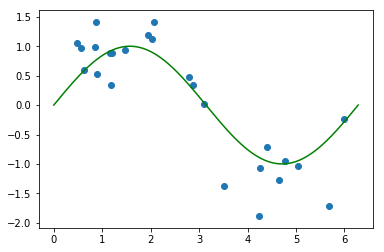

In [2]:
X = np.linspace(0, 2*np.pi, 256, endpoint=True)
S = np.sin(X)
plt.plot(X, S, color="green",  linewidth=1.5, linestyle="-")

x = np.random.uniform(0,2*np.pi,25)
y = np.sin(x)
noise = np.random.normal(0,.5,25)
y = y + noise
plt.scatter(x,y)
plt.show()

In [3]:
np.vander(x,3 + 1)

array([[2.35364034e+01, 8.21284069e+00, 2.86580542e+00, 1.00000000e+00],
       [7.39116958e+00, 3.79439126e+00, 1.94791973e+00, 1.00000000e+00],
       [4.31794616e+01, 1.23079243e+01, 3.50826514e+00, 1.00000000e+00],
       [6.59359074e-01, 7.57555853e-01, 8.70376845e-01, 1.00000000e+00],
       [1.82514146e+02, 3.21759235e+01, 5.67238253e+00, 1.00000000e+00],
       [7.74066773e+01, 1.81629178e+01, 4.26179748e+00, 1.00000000e+00],
       [2.19814348e+01, 7.84700673e+00, 2.80125092e+00, 1.00000000e+00],
       [1.04950588e-01, 2.22496534e-01, 4.71695382e-01, 1.00000000e+00],
       [1.64026705e+00, 1.39083744e+00, 1.17933771e+00, 1.00000000e+00],
       [2.15159800e+02, 3.59065839e+01, 5.99221026e+00, 1.00000000e+00],
       [8.48220806e+01, 1.93051248e+01, 4.39375976e+00, 1.00000000e+00],
       [8.77845917e+00, 4.25545036e+00, 2.06287430e+00, 1.00000000e+00],
       [1.27453722e+02, 2.53261018e+01, 5.03250452e+00, 1.00000000e+00],
       [1.74837847e+00, 1.45129924e+00, 1.20469882e

Linear Regression
---------------------

In [4]:
from sklearn import linear_model

def fit_polynomial(x, y, degree):

    model = linear_model.LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):

    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

### Degree = 1

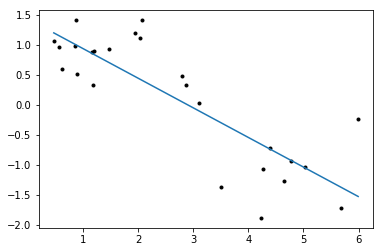

In [5]:
model1 = fit_polynomial(x, y, 1)
p_y = apply_polynomial(model1, np.sort(x))
plt.plot(x, y, 'k.')
plt.plot(np.sort(x), p_y)


### Degree = 8

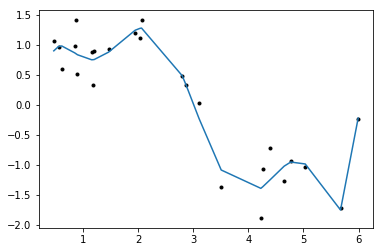

In [6]:
model8 = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model8, np.sort(x))
plt.plot(x, y, 'k.')
plt.plot(np.sort(x), p_y)


### Degree = 20

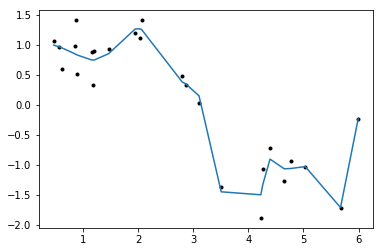

In [7]:
model20 = fit_polynomial(x, y, 20)
p_y = apply_polynomial(model20, np.sort(x))
plt.plot(x, y, 'k.')
plt.plot(np.sort(x), p_y)

### Degree = 3

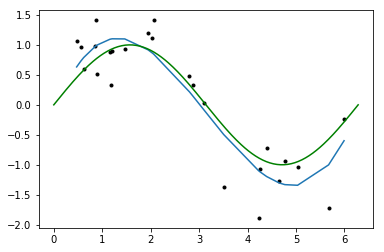

In [8]:
model3 = fit_polynomial(x, y, 3)
p_y = apply_polynomial(model3, np.sort(x))
plt.plot(x, y, 'k.')
plt.plot(np.sort(x), p_y)
plt.plot(X, S, color="green",  linewidth=1.5, linestyle="-")

### Degree = 4

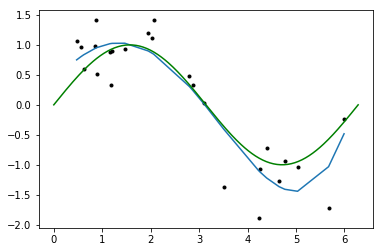

In [9]:
model4 = fit_polynomial(x, y, 4)
p_y = apply_polynomial(model4, np.sort(x))
plt.plot(x, y, 'k.')
plt.plot(np.sort(x), p_y)
plt.plot(X, S, color="green",  linewidth=1.5, linestyle="-")


Split Dataset into train and test
------------------------------------------
In practice, __never__ touch test data while training. It is only to be used to check the model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

Learning Curves
--------------

In [11]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\anaconda3\\envs\\deeplearning-win10\\lib\\site-packages\\matplotlib\\pyplot.py'>

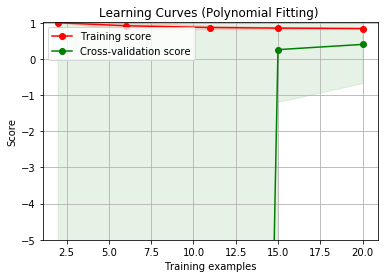

In [15]:
lr = linear_model.LinearRegression()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = 'Learning Curves (Polynomial Fitting) '
degree = 3
plot_learning_curve(estimator, title, np.vander(x, degree + 1), y, ylim=(-5, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\anaconda3\\envs\\deeplearning-win10\\lib\\site-packages\\matplotlib\\pyplot.py'>

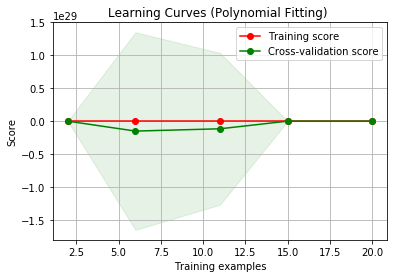

In [16]:
lr = linear_model.LinearRegression()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = 'Learning Curves (Polynomial Fitting) '
degree = 20
plot_learning_curve(lr, title, np.vander(x, degree + 1), y, cv=cv, n_jobs=4)

Boston House Pricing Dataset from Demo-1

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\anaconda3\\envs\\deeplearning-win10\\lib\\site-packages\\matplotlib\\pyplot.py'>

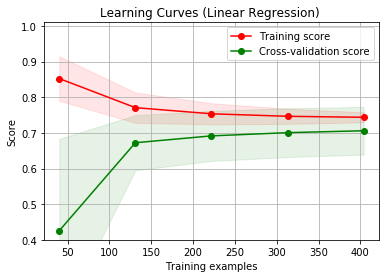

In [17]:
lr = linear_model.LinearRegression()
boston = datasets.load_boston()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
y = boston.target
X = boston.data
title = 'Learning Curves (Linear Regression) '
plot_learning_curve(lr, title, X, y, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'c:\\users\\admin\\anaconda3\\envs\\deeplearning-win10\\lib\\site-packages\\matplotlib\\pyplot.py'>

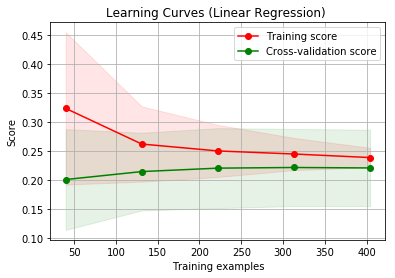

In [18]:
# lr = linear_model.Ridge(alpha=50)
lr = linear_model.Lasso(alpha=50)

boston = datasets.load_boston()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
y = boston.target
X = boston.data
title = 'Learning Curves (Linear Regression) '
plot_learning_curve(lr, title, X, y, cv=cv, n_jobs=1)